<a href="https://colab.research.google.com/github/Cammwr/DATA200/blob/main/CaMeRoN's_10_24_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

This homework is due on or before Tuesday 30 October, 11:59pm Eastern time. Publish your code to GitHub and provide a link to it in your Canvas submission.

For this problem set, we will use the CDC Diabetes Health Indicators dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators). You can load it into your development environment as a Pandas dataframe with:

```bash
pip install ucimlrepo
```

```python
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)
```

This dataset was created by the Centers for Disease Control and Prevention to better understand the relationship between lifestyle and diabetes in the US. Each row represents a person participating in this study.

## Part 1: Feature Selection

Our dataset contains a participant ID column, `Diabetes_binary` (which is the column we will use as our label), and 21 additional columns that can all serve as possible inputs to our model. A complete data dictionary is available at the [UCI dataset page](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).

**Create a dataframe with `Diabetes_binary` and as many additional columns from our original dataset as you feel are necessary as features for a predictive model. Explain your choices.**

## Part 2: Data Cleaning

Based on the dataset that you created for Part 1, **normalize any numeric features, dummy- or one-hot encode any categorical features, and remove any outliers or spurious records. Explain your choices.**

You can use Tensorflow's [`CategoryEncoding` preprocessing layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding) for any boolean ot categorical columns. For more on using preprocessing layers, check out this [Tensorflow tutorial](https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers#apply_the_keras_preprocessing_layers).

## Part 3: Feature Engineering

Based on the dataset that you created for Part 2, **create one or more engineered feature columns and explain why you chose to create these, or explain why you don't feel any are needed.**

## Part 4: Binary classification

Based on the dataset that you created for Part 3:

  - Split your dataset into training and testing samples at an 80:20 ratio;
  - Train a feed-forward neural network to predict whether an individual either has diabetes, or is at risk of developing diabetes.
    - This should include at least 2 hidden layers
    - The output layer should be a single neuron with a sigmoid activation function
    - The model should use a [binary crossentropy loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
    - You can use the Adam optimizer, or another if you prefer
    - You [model's metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) should include accuracy and F1 score

**What is your model's accuracy on both the training and testing datasets?**

  - How does the accuracy compare against the F1 score?
  - Looking at a confusion matrix of your model's predictions (i.e., the true and false positive and negative predictions), would you consider your model to be a good classifier or not? Why?

In [1]:
!pip install ucimlrepo

In [17]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

In [3]:
X.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


## Choices Reasoning
I chose to only focus on the columns ("Age","BMI","PhysHlth", "DiffWalk","HighChol","PhysActivity", "MentHlth") because I thought that considering the data and focus of this assignment, it would best fit our model.

In [4]:
new_data=X.loc[:,["Age","BMI","PhysHlth", "DiffWalk","HighChol","PhysActivity", "MentHlth"]]
new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth
0,9,40,15,1,1,0,18
1,7,25,0,0,0,1,0
2,9,28,30,1,1,0,30
3,11,27,0,0,0,1,0
4,11,24,0,0,1,1,3


In [5]:
new_data["Unhealthy_old"]= (
    (new_data['Age'] > 33) &
    (new_data['PhysHlth'] > 7)
).astype(int)
new_data['overall_health'] = (new_data['PhysHlth'] + new_data['MentHlth']) / 2


new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Unhealthy_old,overall_health
0,9,40,15,1,1,0,18,0,16.5
1,7,25,0,0,0,1,0,0,0.0
2,9,28,30,1,1,0,30,0,30.0
3,11,27,0,0,0,1,0,0,0.0
4,11,24,0,0,1,1,3,0,1.5


 normalize any numeric features, dummy- or one-hot encode any categorical features, and remove any outliers or spurious records. Explain your choices.

 I chose to keep my data the same after further looking at the dataset because the columns that were dichtoumous were 0's and 1's and the rest of my non-dichotomous variables were of reasonable values. I was able to remove the outliers in my dataset that allowed me to find the proper z score after maybe 7 attempts.

In [6]:
avg_age = new_data["Age"].mean()
st_dev = new_data["Age"].std()
new_data["Age"] = (new_data["Age"] - avg_age) / st_dev

In [7]:
new_data.describe()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Unhealthy_old,overall_health
count,2.536800e+05,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.0,253680.000000
mean,9.500792e-17,28.382364,4.242081,0.168224,0.424121,0.756544,3.184772,0.0,3.713426
std,1.000000e+00,6.608694,8.717951,0.374066,0.494210,0.429169,7.412847,0.0,6.645639
min,-2.302427e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-6.653479e-01,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,-1.051634e-02,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.500000
75%,6.443152e-01,31.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.0,3.500000
max,1.626563e+00,98.000000,30.000000,1.000000,1.000000,1.000000,30.000000,0.0,30.000000


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(new_data,y, test_size=0.2)

X_train.describe()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Unhealthy_old,overall_health
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.0,202944.000000
mean,-0.001582,28.388531,4.245679,0.168450,0.423851,0.756731,3.186051,0.0,3.715865
std,1.000425,6.613393,8.714354,0.374267,0.494169,0.429057,7.412559,0.0,6.642068
min,-2.302427,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-0.665348,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,-0.010516,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.500000
75%,0.644315,31.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.0,3.500000
max,1.626563,98.000000,30.000000,1.000000,1.000000,1.000000,30.000000,0.0,30.000000


In [9]:
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
  df = dataframe.copy()
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [28]:
import tensorflow as tf



I chose not to add any additional columns just because after looking at the data we have already, there is really no need for any transformations or creations of extra columns. I also considered the down to adding extra columns to an unfinished model could truly harm or allow misinterpretation of my model. No such thing as a perfect model.

In [11]:
inputs = {
    'Age':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Age'),
    'BMI':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='BMI'),
    'overall_health':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='overall_health')
}

In [12]:
# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('Age'), inputs.get('BMI'), inputs.get('overall_health')])

hidden1 = tf.keras.layers.Dense(
    units=32, name='hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
  units=8, name='hidden2')(hidden1)

dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(hidden2)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

In [59]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    # ???
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    # Binary crossentropy
    loss=tf.keras.losses.BinaryCrossentropy(),
    # Precision, Recall, F1
    metrics=[tf.keras.metrics.F1Score()]
)


TypeError: ignored

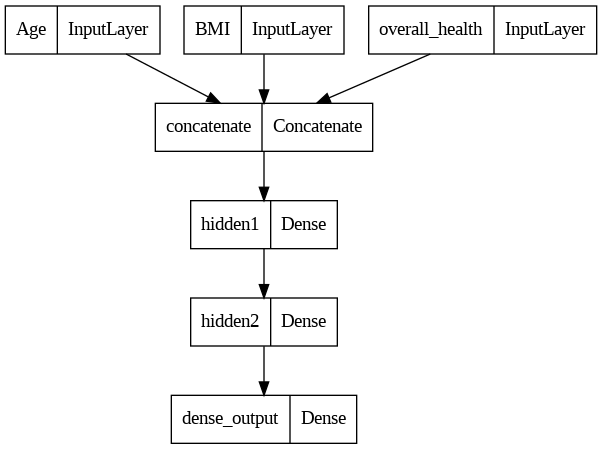

In [58]:
tf.keras.utils.plot_model(dnn_model)

I had an error here ValueError: Tensor conversion requested dtype float32 for Tensor with dtype int64: <tf.Tensor: shape=(1000, 1), dtype=int64, numpy. So I did some googling and it said that when using a fit model method it doesn't interact well with intergers and instead should be floats.

In [39]:
tf.config.run_functions_eagerly(True)


history = dnn_model.fit(
    {name: np.array(value) for name, value in X_train.items()},
    np.array(y_train.values, dtype=np.float32),  # Explicitly cast to float32
    epochs=15,
    batch_size=1000,
    shuffle=True,
    validation_split=0.2
)

# Get details that will be useful for plotting the loss curve.
epochs = history.epoch
hist = pd.DataFrame(history.history)

train_mse = hist['loss']

val_mse = hist['val_loss']



Epoch 1/15
  1/163 [..............................] - ETA: 9s - loss: 1.9590 - f1_score: 0.2254

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['PhysHlth', 'DiffWalk', 'HighChol', 'PhysActivity', 'MentHlth', 'Unhealthy_old'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


163/163 [==============================] - 8s 47ms/step - loss: 2.1460 - f1_score: 0.2443 - val_loss: 2.1464 - val_f1_score: 0.2443
Epoch 2/15
163/163 [==============================] - 8s 51ms/step - loss: 2.1460 - f1_score: 0.2443 - val_loss: 2.1464 - val_f1_score: 0.2443
Epoch 3/15
163/163 [==============================] - 8s 50ms/step - loss: 2.1460 - f1_score: 0.2443 - val_loss: 2.1464 - val_f1_score: 0.2443
Epoch 4/15
163/163 [==============================] - 7s 42ms/step - loss: 2.1460 - f1_score: 0.2443 - val_loss: 2.1464 - val_f1_score: 0.2443
Epoch 5/15
163/163 [==============================] - 10s 64ms/step - loss: 2.1460 - f1_score: 0.2443 - val_loss: 2.1464 - val_f1_score: 0.2443
Epoch 6/15
163/163 [==============================] - 9s 54ms/step - loss: 2.1460 - f1_score: 0.2443 - val_loss: 2.1464 - val_f1_score: 0.2443
Epoch 7/15
163/163 [==============================] - 7s 44ms/step - loss: 2.1460 - f1_score: 0.2443 - val_loss: 2.1464 - val_f1_score: 0.2443
Epoch 8/1

In [40]:
print(hist.keys())


Index(['loss', 'f1_score', 'val_loss', 'val_f1_score'], dtype='object')


In [41]:
from matplotlib import pyplot as plt

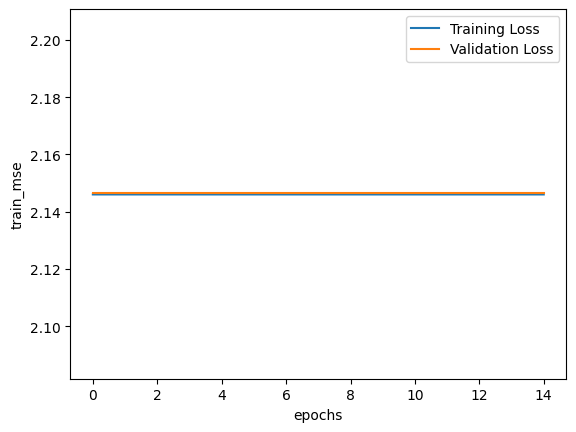

In [46]:
plt.figure()
plt.xlabel("epochs")
plt.ylabel("train_mse")

plt.plot(epochs, train_mse, label="Training Loss")
plt.plot(epochs, history.history["val_loss"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = train_mse.tolist() + history.history["val_loss"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

In [64]:
train_acc = 1 - hist['loss']
train_f1score = hist['f1_score']

val_acc = 1 - hist['val_loss']
val_f1score = hist['val_f1_score']

print(val_acc)
print(val_f1score)

0    -1.146397
1    -1.146397
2    -1.146397
3    -1.146397
4    -1.146397
5    -1.146397
6    -1.146397
7    -1.146397
8    -1.146397
9    -1.146397
10   -1.146397
11   -1.146397
12   -1.146397
13   -1.146397
14   -1.146397
Name: val_loss, dtype: float64
0     [0.24430652]
1     [0.24430652]
2     [0.24430652]
3     [0.24430652]
4     [0.24430652]
5     [0.24430652]
6     [0.24430652]
7     [0.24430652]
8     [0.24430652]
9     [0.24430652]
10    [0.24430652]
11    [0.24430652]
12    [0.24430652]
13    [0.24430652]
14    [0.24430652]
Name: val_f1_score, dtype: object
